In [12]:
from sportsipy.nba.teams import Teams
from scipy.stats import pearsonr
from scipy.stats import skew,kurtosis
import statistics
import pandas as pd
from matplotlib import pyplot as plt
import collections

In [1]:
print('Correlation(WinRatio,GoalsForRatio)\n')

maxCorr= -1.1
minCorr= 1.1
minYear = 2021
maxYear = 2021
corrList = []

for year in range(1970, 2021):
    teams = list(Teams(year))
    statd = {}
    for i,team in enumerate(teams[0:len(teams)]):
        df = team.schedule.dataframe
        df = df[df['playoffs'] == False]
        W = max(df['wins'])
        L = max(df['losses'])
        G = max(df['game'])
        GF = sum(df['points_scored'])
        GA = sum(df['points_allowed'])
        statd[i] = {'Team' : team.name,
            'W' : W,
            'L' : L,
            'G' : G,
            'WinPct' : round(100*W/G,3),
            'GF' : GF,
            'GA' : GA,
            'GD' : GF-GA,
            'GfrPct' : round(100*GF/(GF+GA),3),
            'GD_per' : round((GF-GA)/G,2)}
                    
    df = pd.DataFrame(statd)
    df = df.transpose()

    corr, _ = pearsonr(df['GfrPct'].tolist(), df['WinPct'].tolist())
    corrList.append(corr)
    
    if maxCorr < minCorr:
        minCorr = corr
        maxCorr = corr
        minYear = year
        maxYear = year
        print('%s: %s (new min) (new max)' % (year,round(corr,3)))
    elif corr < minCorr:
        minCorr= corr
        minYear = year
        print('%s: %s (new min)' % (year,round(corr,3)))
    elif corr > maxCorr:
        maxCorr= corr
        maxYear = year
        print('%s: %s (new max)' % (year,round(corr,3)))
    else: 
        print('%s: %s' % (year,round(corr,3)))
        
print('MIN:%s (%s)' % (minYear,round(minCorr,3)))
print('MAX:%s (%s)' % (maxYear,round(maxCorr,3)))
print('AVG:%s' % (round(sum(corrList)/len(corrList),3)))

Correlation(WinRatio,GoalsForRatio)

1970: 0.917 (new min) (new max)
1971: 0.979 (new max)
1972: 0.975
1973: 0.982 (new max)
1974: 0.952
1975: 0.942
1976: 0.945
1977: 0.879 (new min)
1978: 0.956
1979: 0.913
1980: 0.965
1981: 0.986 (new max)
1982: 0.984
1983: 0.976
1984: 0.956
1985: 0.96
1986: 0.927
1987: 0.975
1988: 0.986
1989: 0.978
1990: 0.971
1991: 0.988 (new max)
1992: 0.959
1993: 0.961
1994: 0.975
1995: 0.946
1996: 0.984
1997: 0.971
1998: 0.981
1999: 0.968
2000: 0.969
2001: 0.978
2002: 0.977
2003: 0.977
2004: 0.977
2005: 0.974
2006: 0.948
2007: 0.949
2008: 0.979
2009: 0.99 (new max)
2010: 0.973
2011: 0.971
2012: 0.962
2013: 0.972
2014: 0.97
2015: 0.977
2016: 0.977
2017: 0.964
2018: 0.956
2019: 0.98
2020: 0.96
MIN:1977 (0.879)
MAX:2009 (0.99)
AVG:0.965


In [45]:
'''
1970-2020
MIN:1977 (0.879)
MAX:2009 (0.99)
AVG:0.965
'''

0.96532

In [3]:
year=2009
teams = list(Teams(year))
statd = {}
    
for year in range(1970, 2021):
    teams = list(Teams(year))
    statd = {}
    for i,team in enumerate(teams[0:len(teams)]):
        df = team.schedule.dataframe
        df = df[df['playoffs'] == False]
        W = max(df['wins'])
        L = max(df['losses'])
        G = max(df['game'])
        GF = sum(df['points_scored'])
        GA = sum(df['points_allowed'])
        statd[i] = {'Team' : team.name,
            'W' : W,
            'L' : L,
            'G' : G,
            'WinPct' : round(100*W/G,3),
            'GF' : GF,
            'GA' : GA,
            'GD' : GF-GA,
            'GfrPct' : round(100*GF/(GF+GA),3),
            'GD_per' : round((GF-GA)/G,2)}

df = pd.DataFrame(statd)
df = df.transpose()

l = df[['WinPct','GfrPct']].values.tolist()
seq = sorted(l, key=lambda x: ((-float(x[0])), (-float(x[1]))))
index = [seq.index(v) for v in l]
df['Iwin'] =  index

l = df[['GfrPct','WinPct']].values.tolist()
seq = sorted(l, key=lambda x: ((-float(x[0])), (-float(x[1]))))
index = [seq.index(v) for v in l]
df['Igfp'] =  index

df['Delta'] = df['Igfp']-df['Iwin']
x = list(df['Delta'])
seq = sorted(x,reverse=True)
index = [seq.index(v) for v in x]
df['Idel'] =  index

df = df[['Team','W','L','G','GF','GA','WinPct','GD','GD_per','GfrPct','Iwin','Igfp','Delta','Idel']]
df = df.sort_values(['WinPct'],ascending = (False))
df['WINvs50'] = df['WinPct']-50
df_mdian = df.loc[abs(df['GD']) == min(abs((df['GD'])))]
df_mdian = df_mdian[abs(df_mdian['WINvs50']) == min(abs(df_mdian['WINvs50']))].head(1)
df_lucky = df[df['Delta'] == max(df['Delta'])].head(1)
df_nluck = df[df['Delta'] == min(df['Delta'])].head(1)
print('%s Luckiest,Median,Unluckiest Teams:' % year)
df_ext = pd.concat([df_lucky,pd.concat([df_mdian,df_nluck],sort=False)],sort=False)
print(df_ext.to_string(index=False))

2020 Luckiest,Median,Unluckiest Teams:
             Team   W   L   G    GF    GA  WinPct   GD GD_per  GfrPct  Iwin  Igfp  Delta  Idel WINvs50
   Indiana Pacers  45  28  73  7989  7846  61.644  143   1.96  50.452     6    12      6     0  11.644
     Phoenix Suns  34  39  73  8294  8278  46.575   16   0.22  50.048    15    13     -2    22  -3.425
 Dallas Mavericks  43  32  75  8776  8405  57.333  371   4.95   51.08    12     5     -7    29   7.333


In [4]:
'''
1977 Luckiest,Median,Unluckiest Teams: (most anomolous)
            Team   W   L   G    GF    GA    GD  WinPct GD_per  Iwin  Igd  Delta  Idel WINvs50
  Boston Celtics  44  38  82  8572  8734  -162  53.659  -1.98     7   16      9     0   3.659
 New York Knicks  40  42  82  8905  8906    -1   48.78  -0.01    12   12      0    12   -1.22
    Phoenix Suns  34  48  82  8603  8543    60  41.463   0.73    17   10     -7    21  -8.537

2009 Luckiest,Median,Unluckiest Teams: (most predictable)
               Team   W   L   G    GF    GA   GD  WinPct GD_per  Iwin  Igd  Delta  Idel WINvs50
     Denver Nuggets  54  28  82  8555  8275  280  65.854   3.41     4    7      3     0  15.854
 Philadelphia 76ers  41  41  82  7987  7981    6      50   0.07    14   14      0    11       0
    Houston Rockets  53  29  82  8070  7742  328  64.634      4     7    5     -2    26  14.634
'''

'\n1977 Luckiest,Median,Unluckiest Teams: (most anomolous)\n            Team   W   L   G    GF    GA    GD  WinPct GD_per  Iwin  Igd  Delta  Idel WINvs50\n  Boston Celtics  44  38  82  8572  8734  -162  53.659  -1.98     7   16      9     0   3.659\n New York Knicks  40  42  82  8905  8906    -1   48.78  -0.01    12   12      0    12   -1.22\n    Phoenix Suns  34  48  82  8603  8543    60  41.463   0.73    17   10     -7    21  -8.537\n\n2009 Luckiest,Median,Unluckiest Teams: (most predictable)\n               Team   W   L   G    GF    GA   GD  WinPct GD_per  Iwin  Igd  Delta  Idel WINvs50\n     Denver Nuggets  54  28  82  8555  8275  280  65.854   3.41     4    7      3     0  15.854\n Philadelphia 76ers  41  41  82  7987  7981    6      50   0.07    14   14      0    11       0\n    Houston Rockets  53  29  82  8070  7742  328  64.634      4     7    5     -2    26  14.634\n'

In [5]:
year=1977
teams = list(Teams(year))
statd = {}
    
for i,team in enumerate(teams[0:len(teams)]):
    df = team.schedule.dataframe
    df = df[df['playoffs'] == False]
    W = max(df['wins'])
    L = max(df['losses'])
    G = max(df['game'])
    GF = sum(df['points_scored'])
    GA = sum(df['points_allowed'])
    statd[i] = {'Team' : team.name,
        'W' : W,
        'L' : L,
        'G' : G,
        'WinPct' : round(100*W/G,3),
        'GF' : GF,
        'GA' : GA,
        'GD' : GF-GA,
        'GfrPct' : round(100*GF/(GF+GA),3),
        'GD_per' : round((GF-GA)/G,2)}

df = pd.DataFrame(statd)
df = df.transpose()

l = df[['WinPct','GfrPct']].values.tolist()
seq = sorted(l, key=lambda x: ((-float(x[0])), (-float(x[1]))))
index = [seq.index(v) for v in l]
df['Iwin'] =  index

l = df[['GfrPct','WinPct']].values.tolist()
seq = sorted(l, key=lambda x: ((-float(x[0])), (-float(x[1]))))
index = [seq.index(v) for v in l]
df['Igfp'] =  index

df['Delta'] = df['Igfp']-df['Iwin']
x = list(df['Delta'])
seq = sorted(x,reverse=True)
index = [seq.index(v) for v in x]
df['Idel'] =  index

df = df[['Team','W','L','G','GF','GA','WinPct','GD_per','GfrPct','Iwin','Igfp','Delta','Idel']]
df = df.sort_values(['WinPct'],ascending = (False))
print('%s NBA Season - Ranked by %% Games Won [>LosPct]' % year)
with pd.option_context('display.max_rows',6):
    display(df)

df = df.sort_values('GfrPct',ascending=False)
print('\n%s NBA Season - Ranked by %% Points Scored [<GfrPct]' % year)
with pd.option_context('display.max_rows',6):
    display(df)

df = df.sort_values('Idel',ascending=True)
print('\n%s NBA Season - Ranked by Luck [<Delta (Igfp-Iwin)]' % year)
with pd.option_context('display.max_rows',6):
    display(df)

1977 NBA Season - Ranked by % Games Won [>LosPct]


,Team,W,L,G,GF,GA,WinPct,GD_per,GfrPct,Iwin,Igfp,Delta,Idel
9,Los Angeles Lakers,53,29,82,8763,8540,64.634,2.72,50.644,0,4,4,1
4,Philadelphia 76ers,50,32,82,9034,8711,60.976,3.94,50.91,2,2,0,9
1,Denver Nuggets,50,32,82,9233,8805,60.976,5.22,51.186,1,1,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,Milwaukee Bucks,30,52,82,8889,9145,36.585,-3.12,49.29,19,18,-1,15
13,Buffalo Braves,30,52,82,8612,8976,36.585,-4.44,48.965,20,20,0,9
21,New York Nets,22,60,82,7865,8421,26.829,-6.78,48.293,21,21,0,9



1977 NBA Season - Ranked by % Points Scored [<GfrPct]


,Team,W,L,G,GF,GA,WinPct,GD_per,GfrPct,Iwin,Igfp,Delta,Idel
2,Portland Trail Blazers,49,33,82,9163,8705,59.756,5.59,51.282,3,0,-3,17
1,Denver Nuggets,50,32,82,9233,8805,60.976,5.22,51.186,1,1,0,9
4,Philadelphia 76ers,50,32,82,9034,8711,60.976,3.94,50.91,2,2,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,Atlanta Hawks,31,51,82,8394,8727,37.805,-4.06,49.028,18,19,1,5
13,Buffalo Braves,30,52,82,8612,8976,36.585,-4.44,48.965,20,20,0,9
21,New York Nets,22,60,82,7865,8421,26.829,-6.78,48.293,21,21,0,9



1977 NBA Season - Ranked by Luck [<Delta (Igfp-Iwin)]


,Team,W,L,G,GF,GA,WinPct,GD_per,GfrPct,Iwin,Igfp,Delta,Idel
16,Boston Celtics,44,38,82,8572,8734,53.659,-1.98,49.532,10,16,6,0
5,Detroit Pistons,44,38,82,8970,9055,53.659,-1.04,49.764,9,13,4,1
9,Los Angeles Lakers,53,29,82,8763,8540,64.634,2.72,50.644,0,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,Kansas City Kings,40,42,82,8828,8756,48.78,0.88,50.205,12,9,-3,17
19,Cleveland Cavaliers,43,39,82,8370,8278,52.439,1.12,50.276,11,6,-5,20
14,Phoenix Suns,34,48,82,8603,8543,41.463,0.73,50.175,17,10,-7,21


In [6]:
'''
                      Team   W   L   G    GF    GA    GD    Rwin   GD_per  Iwin  Idiff
2009 Golden State Warriors  29  53  82  8905  9212  -307  0.3537  -3.7439    23     23
2010 Golden State Warriors  26  56  82  8922  9217  -295  0.3171  -3.5976    25     21
2011 Golden State Warriors  36  46  82  8477  8668  -191   0.439  -2.3293    19     20
2012 Golden State Warriors  23  43  66  6453  6678  -225  0.3485  -3.4091    22     22
2013 Golden State Warriors  47  35  82  8296  8223    73  0.5732   0.8902     9     11
2014 Golden State Warriors  51  31  82  8549  8155   394   0.622   4.8049     7      3
2015 Golden State Warriors  67  15  82  9016  8188   828  0.8171  10.0976     0      0
2016 Golden State Warriors  73   9  82  9421  8539   882  0.8902  10.7561     0      0
2017 Golden State Warriors  67  15  82  9503  8549   954  0.8171  11.6341     0      0
2018 Golden State Warriors  58  24  82  9304  8814   490  0.7073   5.9756     2      2
2019 Golden State Warriors  57  25  82  9650  9120   530  0.6951   6.4634     2      1
2020 Golden State Warriors  15  50  65  6912  7478  -566  0.2308  -8.7077    29     29
'''

'\n                      Team   W   L   G    GF    GA    GD    Rwin   GD_per  Iwin  Idiff\n2009 Golden State Warriors  29  53  82  8905  9212  -307  0.3537  -3.7439    23     23\n2010 Golden State Warriors  26  56  82  8922  9217  -295  0.3171  -3.5976    25     21\n2011 Golden State Warriors  36  46  82  8477  8668  -191   0.439  -2.3293    19     20\n2012 Golden State Warriors  23  43  66  6453  6678  -225  0.3485  -3.4091    22     22\n2013 Golden State Warriors  47  35  82  8296  8223    73  0.5732   0.8902     9     11\n2014 Golden State Warriors  51  31  82  8549  8155   394   0.622   4.8049     7      3\n2015 Golden State Warriors  67  15  82  9016  8188   828  0.8171  10.0976     0      0\n2016 Golden State Warriors  73   9  82  9421  8539   882  0.8902  10.7561     0      0\n2017 Golden State Warriors  67  15  82  9503  8549   954  0.8171  11.6341     0      0\n2018 Golden State Warriors  58  24  82  9304  8814   490  0.7073   5.9756     2      2\n2019 Golden State Warriors  5

In [7]:
minDelta = 0
maxDelta = 0
deltaList = []
deltaSumL = []
for year in range(1970, 2021):
    teams = list(Teams(year))
    statd = {}
    for i,team in enumerate(teams[0:len(teams)]):
        df = team.schedule.dataframe
        df = df[df['playoffs'] == False]
        W = max(df['wins'])
        G = max(df['game'])
        GF = sum(df['points_scored'])
        GA = sum(df['points_allowed'])
        statd[i] = {'Team' : team.name,
            'WinPct' : round(100*W/G,3),
            'GfrPct' : round(100*GF/(GF+GA),3)}
        
    df = pd.DataFrame(statd)
    df = df.transpose()

    l = df[['WinPct','GfrPct']].values.tolist()
    seq = sorted(l, key=lambda x: ((-float(x[0])), (-float(x[1]))))
    index = [seq.index(v) for v in l]
    df['Iwin'] =  index

    l = df[['GfrPct','WinPct']].values.tolist()
    seq = sorted(l, key=lambda x: ((-float(x[0])), (-float(x[1]))))
    index = [seq.index(v) for v in l]
    df['Igfp'] =  index

    df['Delta'] = df['Igfp']-df['Iwin']
    x = list(df['Delta'])
    
    locMinDelta = int(min(df['Delta']))
    locMinTeam = df.Team[df['Delta'] == locMinDelta]
    locMinTeam = locMinTeam.to_string(index=False)
    locMaxDelta = int(max(df['Delta']))
    locMaxTeam = df.Team[df['Delta'] == locMaxDelta]
    locMaxTeam = locMaxTeam.to_string(index=False)
    
    if maxDelta == minDelta:
        minDelta = locMinDelta
        maxDelta = locMaxDelta
        minTeam = locMinTeam
        maxTeam = locMaxTeam
        minYear = year
        maxYear = year
        print('%s %s: %s (new minDelta) (new maxDelta)' % (year,locMinTeam,round(minDelta,3)))
    if locMinDelta < minDelta:
        minDelta= locMinDelta
        minTeam = locMinTeam
        minYear = year
        print('%s %s: %s (new min)' % (year,locMinTeam,round(minDelta,3)))
    if locMaxDelta > maxDelta:
        maxDelta = locMaxDelta
        maxTeam = locMaxTeam
        maxYear = year
        print('%s %s: %s (new max)' % (year,locMaxTeam,round(maxDelta,3)))
    
    for d in x:
        deltaList.append(d)

deltaList=sorted(deltaList,reverse=False)

1970  Philadelphia 76ers: -3 (new minDelta) (new maxDelta)
1970 Delta Sum: 0
1971  Detroit Pistons: 3 (new max)
1971 Delta Sum: 0
1972 Delta Sum: 0
1973 Delta Sum: 0
1974 Delta Sum: 0
1975  Portland Trail Blazers
        Milwaukee Bucks: -5 (new min)
1975  Seattle SuperSonics: 4 (new max)
1975 Delta Sum: 0
1976 Delta Sum: 0
1977  Phoenix Suns: -7 (new min)
1977  Boston Celtics: 6 (new max)
1977 Delta Sum: 0
1978 Delta Sum: 0
1979 Delta Sum: 0
1980 Delta Sum: 0
1981 Delta Sum: 0
1982 Delta Sum: 0
1983 Delta Sum: 0
1984 Delta Sum: 0
1985 Delta Sum: 0
1986 Delta Sum: 0
1987 Delta Sum: 0
1988 Delta Sum: 0
1989 Delta Sum: 0
1990 Delta Sum: 0
1991 Delta Sum: 0
1992 Delta Sum: 0
1993 Delta Sum: 0
1994 Delta Sum: 0
1995 Delta Sum: 0
1996 Delta Sum: 0
1997 Delta Sum: 0
1998 Delta Sum: 0
1999 Delta Sum: 0
2000 Delta Sum: 0
2001 Delta Sum: 0
2002 Delta Sum: 0
2003  Minnesota Timberwolves: 8 (new max)
2003 Delta Sum: 0
2004 Delta Sum: 0
2005 Delta Sum: 0
2006 Delta Sum: 0
2007 Delta Sum: 0
2008 De

In [14]:
print('max: ' + str(max(deltaList)))
print('min: ' + str(min(deltaList)))
print('median: ' + str(statistics.median(deltaList)))
print('mean: ' + str(round(statistics.mean(deltaList),2)))
print('mode: ' + str(statistics.mode(deltaList)))
print('pstdev: ' + str(round(statistics.pstdev(deltaList),2)))
print('pvariance: ' + str(round(statistics.pvariance(deltaList),2)))
print('skew: ' + str(round(skew(deltaList,bias=False),2)))
print('kurtosis-3: ' + str(round(kurtosis(deltaList,bias=False)-3,2)))

quartiles=[round(q, 2) for q in statistics.quantiles(deltaList, n=4)]
print('quartiles(excl): '+ str(quartiles))
deciles=[round(q, 2) for q in statistics.quantiles(deltaList, n=10)]
print('deciles(excl): '+ str(deciles))
print('count: ' + str(len(deltaList)))

max: 8
min: -11
median: 0.0
mean: 0
mode: 0
pstdev: 2.03
pvariance: 4.13
skew: -0.06
kurtosis-3: -0.8
quartiles(excl): [-1.0, 0.0, 1.0]
deciles(excl): [-2.0, -1.0, -1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 2.0]
count: 1318


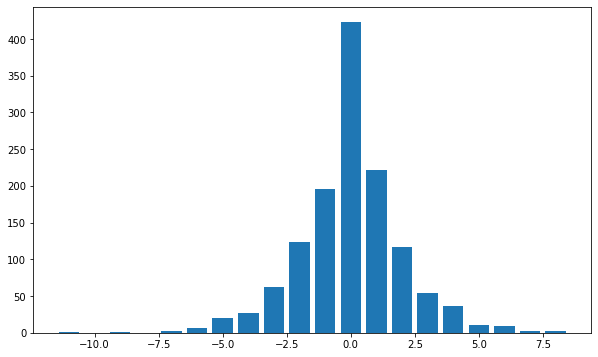

In [9]:
counter=collections.Counter(deltaList)
dely = list(counter.values())
delx = list(counter.keys())
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(delx,dely)
plt.show()

In [10]:
pd.DataFrame(list(zip(delx,dely)),columns=['delta','freq'])

,delta,freq
0,-11,1
1,-9,1
2,-7,3
3,-6,6
4,-5,20
5,-4,27
6,-3,63
7,-2,123
8,-1,196
9,0,423
